In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import scipy.stats as stats

In [2]:
df = pd.read_csv('../../data/tests/Titanic_R.csv')

In [3]:
df.head()

,pclass,survived,Residence,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Gender
0,3,0,0,"Abbing, Mr. Anthony",42,0,0,C.A. 5547,7.55,,S,,,,0
1,3,0,0,"Abbott, Master. Eugene Joseph",13,0,2,C.A. 2673,20.25,,S,,,"East Providence, RI",0
2,3,0,0,"Abbott, Mr. Rossmore Edward",16,1,1,C.A. 2673,20.25,,S,,190,"East Providence, RI",0
3,3,1,0,"Abbott, Mrs. Stanton (Rosa Hunt)",35,1,1,C.A. 2673,20.25,,S,A,,"East Providence, RI",1
4,3,1,2,"Abelseth, Miss. Karen Marie",16,0,0,348125,7.65,,S,16,,"Norway Los Angeles, CA",1


## Cleaning the Data

The categorical variables can be described as follows.
- Survived: 0 = died, 1 = survived.
- Gender: 0 = male, 1 = female.
- Residence: 0 = America, 1 = British, 2 = Other

We will change the data accordingly.

In [4]:
df['survived'] = df['survived'].replace({0: 'died', 1: 'survived'})
df['Gender'] = df['Gender'].replace({0: 'male', 1: 'female'})
df['Residence'] = df['Residence'].replace({0: 'America', 1: 'British', 2: 'Other'})

In [5]:
df.head()

,pclass,survived,Residence,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Gender
0,3,died,America,"Abbing, Mr. Anthony",42,0,0,C.A. 5547,7.55,,S,,,,male
1,3,died,America,"Abbott, Master. Eugene Joseph",13,0,2,C.A. 2673,20.25,,S,,,"East Providence, RI",male
2,3,died,America,"Abbott, Mr. Rossmore Edward",16,1,1,C.A. 2673,20.25,,S,,190,"East Providence, RI",male
3,3,survived,America,"Abbott, Mrs. Stanton (Rosa Hunt)",35,1,1,C.A. 2673,20.25,,S,A,,"East Providence, RI",female
4,3,survived,Other,"Abelseth, Miss. Karen Marie",16,0,0,348125,7.65,,S,16,,"Norway Los Angeles, CA",female


In [6]:
# Note that in the line below, the choice of 'pclass' as the column is irrelevant, as all columns display the same number.

survival_df = df.groupby(['survived', 'Residence']).count().reset_index()

survival_df = survival_df.pivot(index = 'survived',
                                columns = 'Residence')['pclass']

survival_df['Sum'] = survival_df.sum(axis = 1)
survival_df

Residence,America,British,Other,Sum
survived,,,,
died,113,206,490,809
survived,145,96,259,500


In [7]:
# For future reference, pd.crosstab may be a better way to acheive this result.

sums = survival_df.sum()
survival_df = survival_df.append(sums, ignore_index = True)
survival_df = survival_df.rename(index = {0: 'Died', 1: 'Survived', 2: 'Sum'})
survival_df

Residence,America,British,Other,Sum
Died,113,206,490,809
Survived,145,96,259,500
Sum,258,302,749,1309


## Visualizing the Data

<AxesSubplot:xlabel='Residence'>

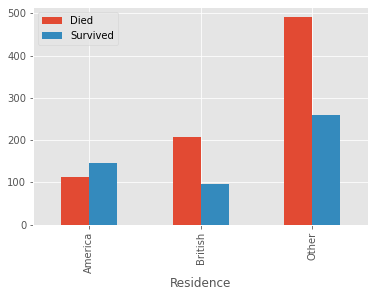

In [8]:
survival_df[['America', 'British', 'Other']].loc[['Died', 'Survived']].transpose().plot.bar()

In [9]:
# In the line below, survival_df.loc['Sum'] refers to the Sum row, and we are dropping the 'Sum' column
# in the drop statement.

# Gives a percentage of died and survived by residence.
surv_percent = survival_df.loc[['Died', 'Survived']].div(survival_df.loc['Sum']).drop('Sum', axis = 1)
surv_percent

Residence,America,British,Other
Died,0.437984,0.682119,0.654206
Survived,0.562016,0.317881,0.345794


<AxesSubplot:xlabel='Residence'>

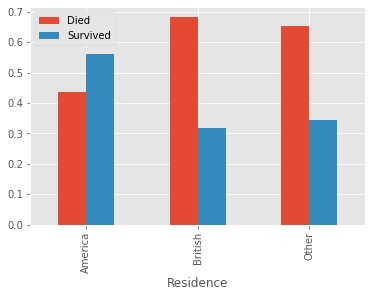

In [10]:
surv_percent.transpose().plot.bar()

## Running the Chi Square Test

The null hypothesis is that nationality is not associated with survival, and the alternative hypothesis is that nationality is associated with survival.

From Wikipedia

"Pearson's chi-squared test is a statistical test applied to sets of categorical data to evaluate how likely it is that any observed difference between the sets arose by chance. 

It tests a null hypothesis stating that the frequency distribution of certain events observed in a sample is consistent with a particular theoretical distribution. The events considered must be mutually exclusive and have total probability 1. A common case for this is where the events each cover an outcome of a categorical variable. A simple example is the hypothesis that an ordinary six-sided die is "fair" (i. e., all six outcomes are equally likely to occur.)"

Because 500 / 1309 = .381 = 38% of passengers did not survive, if there is no association between nationality and survival, then approximately 38% of passengers for each nationality would have survived.

In [11]:
survival_array = survival_df.loc[['Died','Survived']].drop('Sum', axis = 1).to_numpy()
data = survival_array.tolist()
data

[[113, 206, 490], [145, 96, 259]]

In [12]:
stat, p, dof, expected = stats.chi2_contingency(data)

In [13]:
print (f"X-Squared: {stat} \np-value: {p}")

X-Squared: 44.83460459720294 
p-value: 1.837762191796933e-10


Because the p values is less than .05, we can reject the null hypothesis, and conclude that nationality is associated with survival.